In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Sales'] = data['Sales'].map(lambda x: float(x.replace(',', '.')))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


# Задание 1

- Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
- Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
- Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [4]:
data.duplicated().sum()

0

Text(0, 0.5, 'подгруппа товаров')

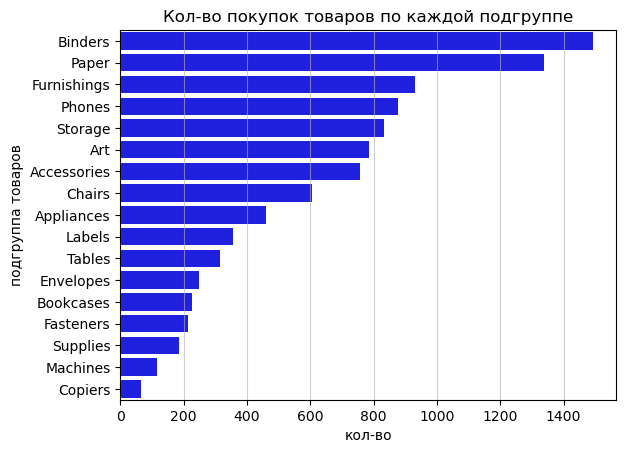

In [5]:
sns.barplot(
    data = data['Sub-Category'].value_counts().reset_index(),
    y = 'Sub-Category',
    x = 'count',
    color = 'blue')

plt.grid(visible = True,
         axis = 'x',
         alpha = 0.6,
         linestyle = '-')

plt.title('Кол-во покупок товаров по каждой подгруппе')
plt.xlabel('кол-во')
plt.ylabel('подгруппа товаров')

In [6]:
data.sort_values(by = 'Order Date', ascending = False).head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
5,1298,2018-12-30,Стандарт,Калиниград,Binders,7366.876


Даты двухгодичной давности: 2016-12-30 00:00:00


Text(0, 0.5, 'подгруппа товаров')

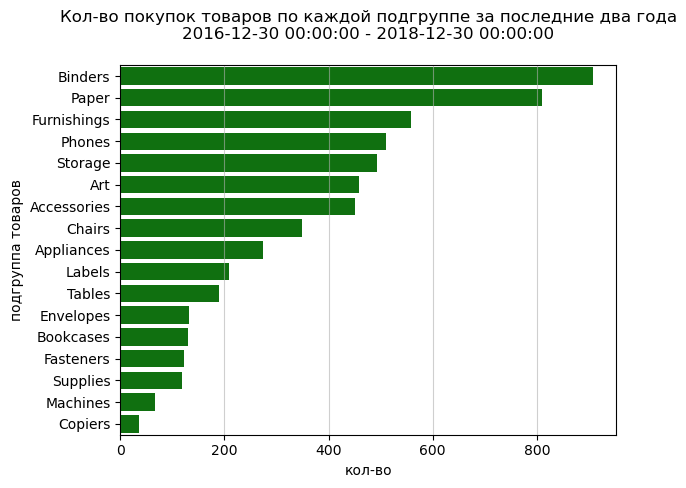

In [7]:
time_begin = data.iloc[0]['Order Date'] - pd.Timedelta(days = 2*365)
print(f'Даты двухгодичной давности: {time_begin}')
data_2 = data[data['Order Date'] >= time_begin]['Sub-Category'].value_counts().reset_index()

sns.barplot(
    data = data_2,
    x = 'count',
    y = 'Sub-Category',
    color = 'green'
)
plt.grid(visible = True,
         axis = 'x',
         alpha = 0.6,
         linestyle = '-')

plt.title(f'Кол-во покупок товаров по каждой подгруппе за последние два года\n{time_begin} - {data.iloc[0]['Order Date']}\n')
plt.xlabel('кол-во')
plt.ylabel('подгруппа товаров')

Даты двухгодичной давности: 2017-12-30 00:00:00


Text(0, 0.5, 'подгруппа товаров')

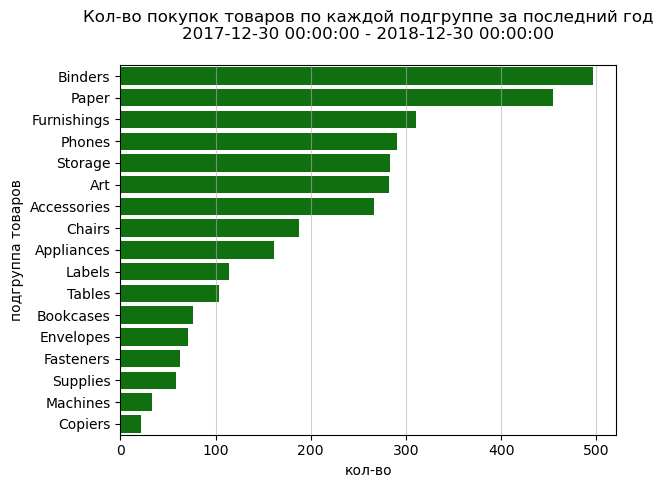

In [8]:
time_begin = data.iloc[0]['Order Date'] - pd.Timedelta(days = 365)
print(f'Даты двухгодичной давности: {time_begin}')
data_2 = data[data['Order Date'] >= time_begin]['Sub-Category'].value_counts().reset_index()

sns.barplot(
    data = data_2,
    x = 'count',
    y = 'Sub-Category',
    color = 'green'
)
plt.grid(visible = True,
         axis = 'x',
         alpha = 0.6,
         linestyle = '-')

plt.title(f'Кол-во покупок товаров по каждой подгруппе за последний год\n{time_begin} - {data.iloc[0]['Order Date']}\n')
plt.xlabel('кол-во')
plt.ylabel('подгруппа товаров')

## Вывод


Причечание: использую дельту в кол-ве дней:

- 'самая свежая дата' - 365 дней = ровно год назад
- 'самая свежая дата' - 365*2 = ровно два года назад

---
- Самая покупаемые подгруппы товаров за весь период/за два последних года/за последний год: Binders, Paper, Furnishings, Phones, Storage
- Кол-во продаж Binders и Papers значительно превышают остальные подгруппы
- Самые не продаваемые подгруппы товаров за весь период/за два последних года/за последний год:: Copies, Machines
---

# Задание 2

- Построить boxplot («Ящик с усами») на основе продаж (Sales)
- Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

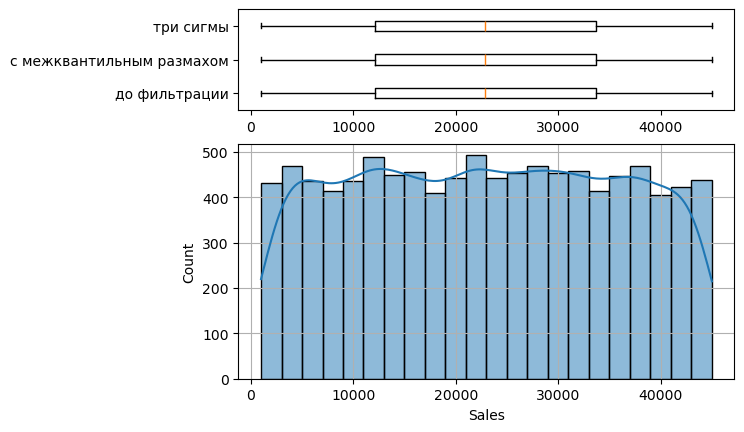

In [9]:
#####################################
#### базовая фильтрация аномалий ####
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data_base = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]['Sales']
#####################################


###############################################
#### фильтрация аномалий методом трех сигм ####
mean = data['Sales'].mean()
std_dev = data['Sales'].std()
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev
filtered_data_3_sigm = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]['Sales']
###############################################

spisok_to_plot = [data['Sales'].to_list(), filtered_data_base.to_list(), filtered_data_3_sigm.to_list()]
names = ['до фильтрации', 'с межквантильным размахом', 'три сигмы']

fig, (ax_1,ax_2) = plt.subplots(2,
                                gridspec_kw = {'height_ratios':(.3, .7)})
ax_1 = plt.subplot(2,1,1)
plt.boxplot(
    spisok_to_plot,
    labels = names,
    vert  = False)

ax_2 = plt.subplot(2,1,2)
sns.histplot(data = filtered_data_3_sigm,
             kde = True,
             ax = ax_2)
plt.grid()

## Вывод


- попробовали отфильтровать Sales двумя способами ('с межквантильным размахом', 'три сигмы')
- аномальных значений нет

# Задание 3

- Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
- Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [10]:
pd.cut(data['Sales'], bins = 3).unique()

[(30331.205, 44995.41], (15666.999, 30331.205], (958.801, 15666.999]]
Categories (3, interval[float64, right]): [(958.801, 15666.999] < (15666.999, 30331.205] < (30331.205, 44995.41]]

In [11]:
data['Sale_group'] = pd.cut(data['Sales'], bins = 3, labels = ['маленькие продажи','средние продажи','высокие продажи'])
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,высокие продажи
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,средние продажи
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,высокие продажи
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00,маленькие продажи
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,средние продажи


In [12]:
groupby_class = data.groupby(['Region', 'Sale_group'])['Sales']
plot_1 = pd.concat([groupby_class.min(), groupby_class.max(), groupby_class.mean(), groupby_class.sum()], axis = 1)
plot_1.columns = ['min', 'max', 'mean', 'sum']
plot_1 = plot_1.reset_index()
plot_1

,Region,Sale_group,min,max,mean,sum
0,Владивосток,маленькие продажи,1003.082,15658.86,8302.082951,7.862073e+06
1,Владивосток,средние продажи,15671.520,30326.24,23088.470492,2.064109e+07
2,Владивосток,высокие продажи,30350.800,44990.44,37552.459439,3.544952e+07
3,Калиниград,маленькие продажи,1021.104,15651.07,8555.503429,8.889168e+06
4,Калиниград,средние продажи,15670.850,30319.03,23135.912288,2.568086e+07
5,Калиниград,высокие продажи,30339.080,44986.26,37699.565106,3.736027e+07
6,Москва,маленькие продажи,1012.536,15663.45,8245.852623,4.287843e+06
7,Москва,средние продажи,15668.800,30328.97,23080.500146,1.264811e+07
8,Москва,высокие продажи,30346.040,44995.41,37652.252962,1.995569e+07
9,Урал,маленькие продажи,1002.794,15653.63,8389.712850,6.434910e+06


Text(0.5, 1.0, 'Суммарные продажи по "регион-группа"')

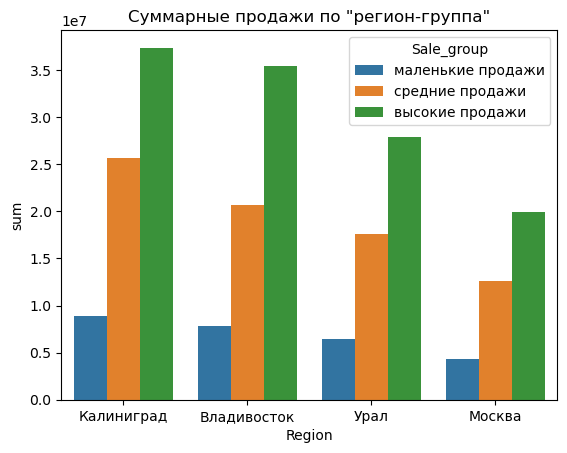

In [13]:
sns.barplot(
    data = plot_1.reset_index().sort_values(by = 'sum', ascending = False),
    x = 'Region',
    y = 'sum',
    hue = 'Sale_group')
plt.title('Суммарные продажи по "регион-группа"')

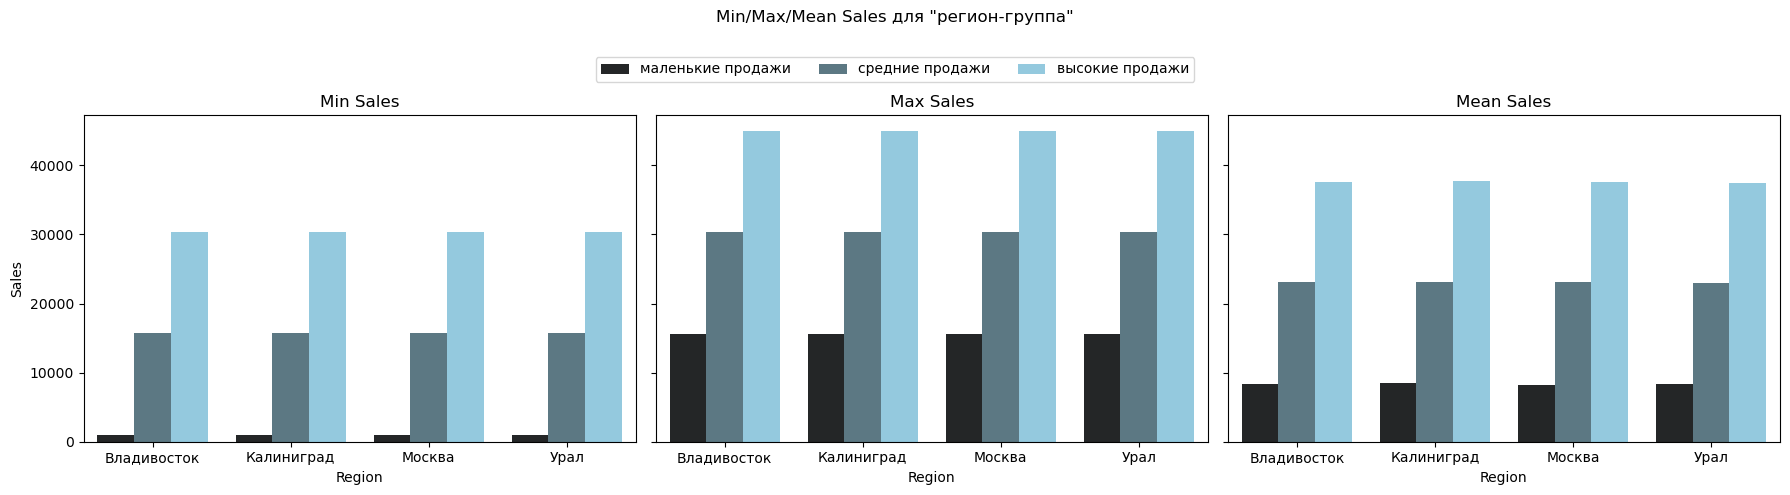

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.barplot(data = plot_1, x = 'Region', y = 'min', hue = 'Sale_group', ax=axes[0], color='skyblue')
axes[0].set_title('Min Sales')
axes[0].set_ylabel('Sales')

sns.barplot(data = plot_1, x = 'Region', y = 'max', hue = 'Sale_group', ax=axes[1], color='skyblue', legend = False)
axes[1].set_title('Max Sales')
axes[1].set_ylabel('Sales')

sns.barplot(data = plot_1, x = 'Region', y = 'mean', hue = 'Sale_group', ax=axes[2], color='skyblue', legend = False)
axes[2].set_title('Mean Sales')
axes[2].set_ylabel('Sales')
plt.suptitle('Min/Max/Mean Sales для "регион-группа"')

axes[0].legend().remove()
plt.tight_layout(rect=[0, 0, 1, 0.90])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.9))
plt.show()

In [15]:
plot_2 = data.groupby(['Order Date','Region','Sale_group'])['Sales'].sum().reset_index()
plot_2.head()

,Order Date,Region,Sale_group,Sales
0,2015-01-03,Владивосток,маленькие продажи,0.0
1,2015-01-03,Владивосток,средние продажи,0.0
2,2015-01-03,Владивосток,высокие продажи,0.0
3,2015-01-03,Калиниград,маленькие продажи,0.0
4,2015-01-03,Калиниград,средние продажи,0.0


In [16]:
def plot_cumsum_sales(sales_type):
    
    plt.figure(figsize = (12,5))
    for region in data['Region'].unique():
        def_plot = plot_2[(plot_2['Region'] == region) & (plot_2['Sale_group'] == sales_type)].sort_values(by = 'Order Date', ascending = True)
        def_plot['cumsum_sales'] = def_plot['Sales'].cumsum()

        sns.lineplot(
            data = def_plot,
            x = 'Order Date',
            y = 'cumsum_sales',
            label = region
        )

    plt.grid(visible = True,
        axis = 'x',
        alpha = 0.2,
        color = 'black',
        linestyle = '-')
    plt.grid(visible = True,
            axis = 'y',
            alpha = 0.2,
            color = 'black',
            linestyle = '-')
    plt.legend()
    plt.title(f'Региональные накопительные(cumsum) {sales_type}')

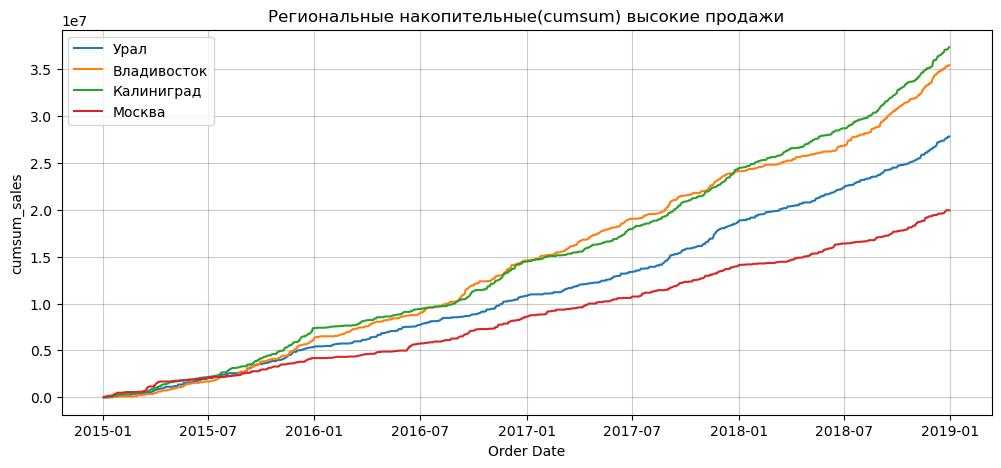

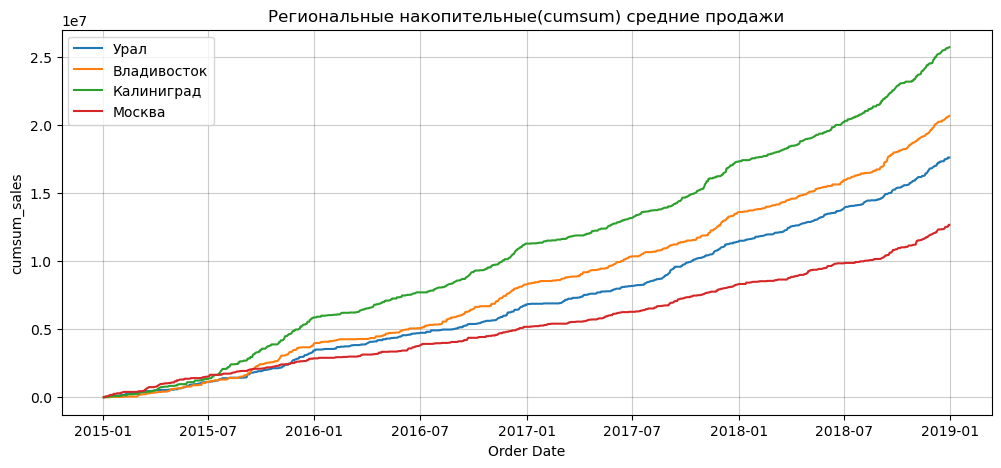

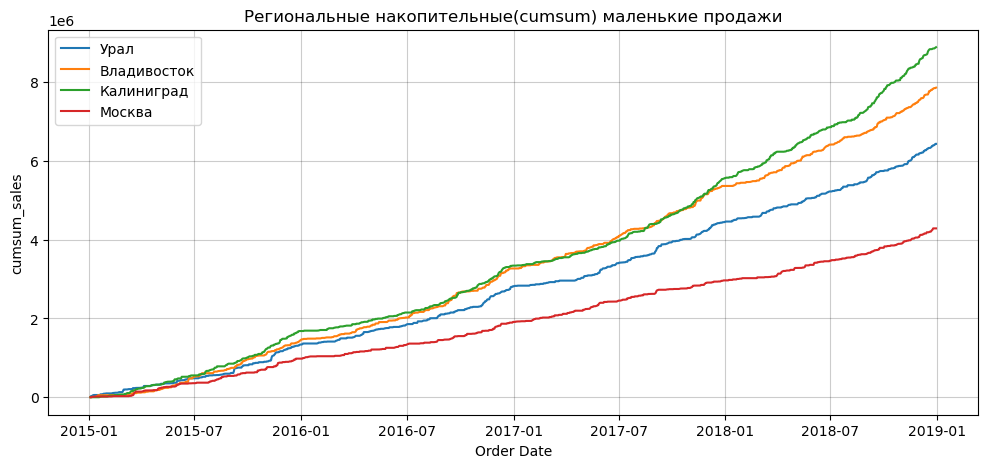

In [17]:
for sales_type in data['Sale_group'].unique():
    plot_cumsum_sales(sales_type)

In [18]:
data = data.sort_values(by = 'Order Date', ascending = True)
data['Квартал'] = data['Order Date'].dt.to_period('Q')
data['Квартал'] = data['Квартал'].map(lambda x: str(x))
plot_11 = data.groupby(['Квартал', 'Region', 'Sale_group'])['Sales'].sum().reset_index()
plot_11.head()

,Квартал,Region,Sale_group,Sales
0,2015Q1,Владивосток,маленькие продажи,116405.029
1,2015Q1,Владивосток,средние продажи,350497.450
2,2015Q1,Владивосток,высокие продажи,412594.900
3,2015Q1,Калиниград,маленькие продажи,222422.912
4,2015Q1,Калиниград,средние продажи,487255.210


In [19]:
def quartal_regional_sales(sales_type):
    plt.figure(figsize = (12,5))
    for region in data['Region'].unique():
        sns.lineplot(
            data = plot_11[(plot_11['Region'] == region) & (plot_11['Sale_group'] == sales_type)],
            x = 'Квартал',
            y = 'Sales',
            label = f'{region} - {sales_type}',
        )
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xticks(rotation = 45)
    plt.title(f'Поквартальные региональные {sales_type}')
    plt.show()

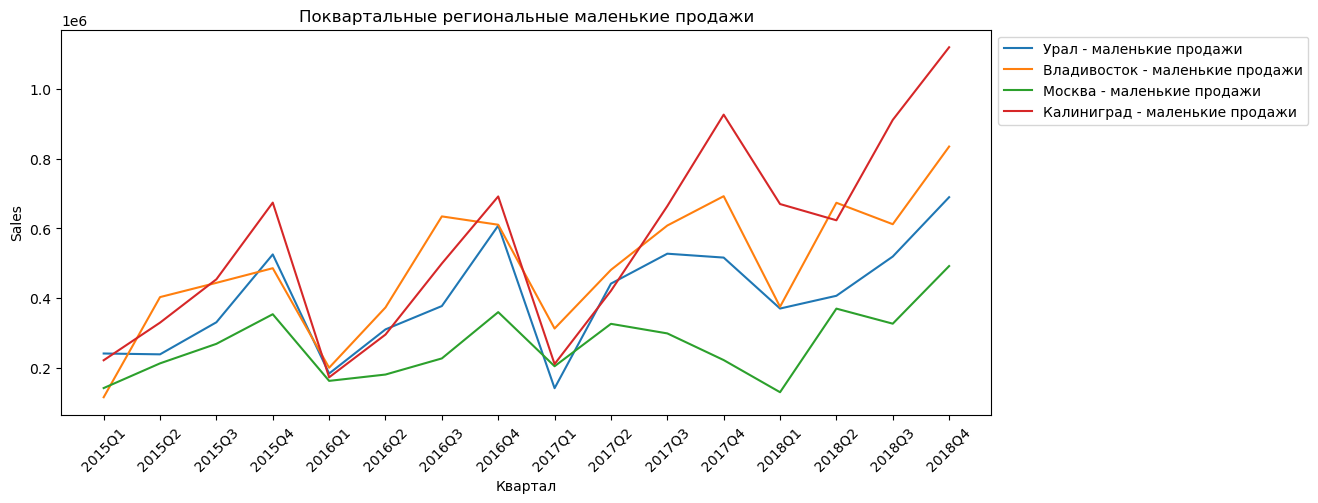

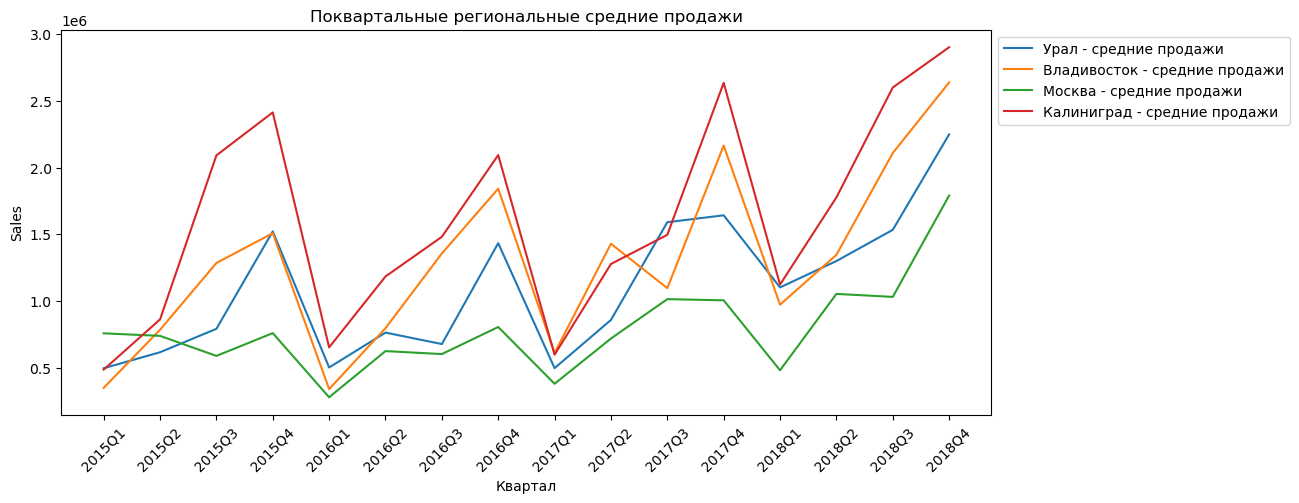

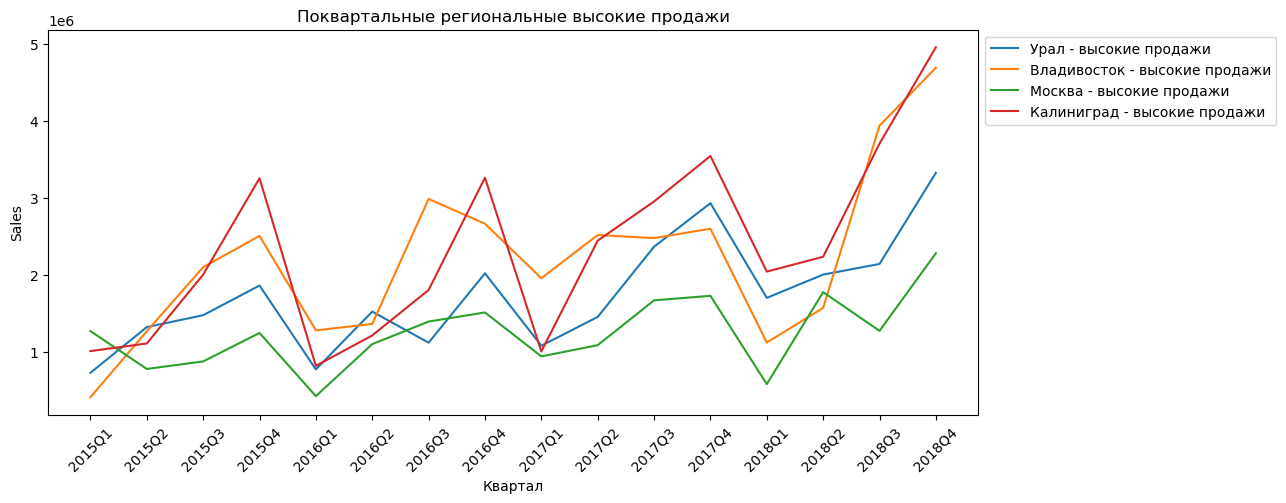

In [20]:
for sales_type in data['Sale_group'].unique():
    quartal_regional_sales(sales_type)

## Вывод

- лучше всего продается в Калининграде по всему диапазону продаж (маленькие, средние, высокие)
- Хуже всего в Москве
- минимальное-максимальное-среднее по стратам регион-группа схожи

---

- рост продаж происходит, в основном в 4-х кварталах каждого года у каждого региона-группы
- падение продаж в 1-х кварталах каждого года у каждого региона-группы
- в целом есть тенденция на межквартальный рост: т.е. между Q1 и Q4 происходит рост разной интенсивности